In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
hekT = pd.read_excel('./dot_under_0.2/NFRP_HEK_target.xlsx')
hekT.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.021,[2],0,0.334,35,0.067,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9H773|DCTP1_HUMAN(pre=R,post=S)",219973818
1,b1906_293T_proteinID_01A_QE3_122212.01938.01938.4,1,QHQDMPAPRPPGPR/4,0.192,0.007,[2],0,0.005,15,0.117,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UBV2|SE1L1_HUMAN(pre=R,post=P)",200243349
2,b1906_293T_proteinID_01A_QE3_122212.01940.01940.2,1,QDEQVGLPGK/2,0.177,0.018,[2],0,-0.003,83,0.057,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P11388|TOP2A_HUMAN(pre=K,post=G)",196872217
3,b1906_293T_proteinID_01A_QE3_122212.01941.01941.2,1,AGEVQEPELR/2,0.153,0.018,[2],0,-0.003,73,0.042,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P25311|ZA2G_HUMAN(pre=R,post=G)",6755166
4,b1906_293T_proteinID_01A_QE3_122212.01945.01945.4,1,AKFYPEDVSEELIQDITQR/4,0.190,0.017,[2],0,0.006,20,0.078,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P26038|MOES_HUMAN(pre=R,post=L)",10566433


In [52]:
# sequence length
print(len(hekT))

seq1 = [] # 0~10
seq2 = [] # 11~20
seq3 = [] # 21~

for i in range(len(hekT)):
    if not i % 10000:
        print(i)
    ID = hekT.loc[i, 'ID']
    seq = ID[:-2]
    
    if len(seq) >= 0 and len(seq) <=10:
        d = hekT.loc[i, 'Dot']
        seq1.append(d)
    
    elif len(seq) >= 11 and len(seq) <= 20:
        d = hekT.loc[i, 'Dot']
        seq2.append(d)
    
    elif len(seq) >= 21:
        d = hekT.loc[i, 'Dot']
        seq3.append(d)

117350
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [59]:
# charge state
print(len(hekT))

cs1 = [] # 2
cs2 = [] # 3
cs3 = [] # 4~

for i in range(len(hekT)):
    if not i % 10000:
        print(i)
    ID = hekT.loc[i, 'ID']
    charge = int(ID[-1])
    
    if charge == 2:
        c = hekT.loc[i, 'Dot']
        cs1.append(c)
    
    elif charge == 3:
        c = hekT.loc[i, 'Dot']
        cs2.append(c)
    
    elif charge >= 4:
        c = hekT.loc[i, 'Dot']
        cs3.append(c)

117350
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [61]:
# C-term
print(len(hekT))

ct1 = [] # 2
ct2 = [] # 3
ct3 = [] # 4~

for i in range(len(hekT)):
    if not i % 10000:
        print(i)
    ID = hekT.loc[i, 'ID']
    seq = ID[:-2]
    cterm = seq[-1]
    
    if cterm == 'R':
        ct = hekT.loc[i, 'Dot']
        ct1.append(ct)
    
    elif cterm == 'K':
        ct = hekT.loc[i, 'Dot']
        ct2.append(ct)
    
    else:
        ct = hekT.loc[i, 'Dot']
        ct3.append(ct)

117350
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [63]:
hekD = pd.read_excel('./dot_under_0.2/NFRP_HEK_decoy.xlsx')
hekD.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.168,0.043,[2],0,-0.002,5,0.103,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9NSY1|BMP2K_HUMAN(pre=K,post=G)",713038584
1,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PWDDLDLSR/2,0.184,0.022,[2],0,0.495,48,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q99490|AGAP2_HUMAN(pre=R,post=E)",650549716
2,b1906_293T_proteinID_01A_QE3_122212.01934.01934.3,1,KHSEEHSE/3,0.168,0.090,[2],0,0.327,4,0.070,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P05109|S10A8_HUMAN(pre=K,post=-)",645593860
3,b1906_293T_proteinID_01A_QE3_122212.01946.01946.2,1,FPMAQK/2,0.177,0.000,[0],0,-0.009,1,0.177,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P50914|RL14_HUMAN(pre=R,post=C)",599450629
4,b1906_293T_proteinID_01A_QE3_122212.01952.01952.5,1,GHFDFSVDHILDKHDAAISR/5,0.168,0.039,[2],0,0.208,6,0.090,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q96EE3|SEH1_HUMAN(pre=R,post=R)",646764763


In [64]:
# sequence length
print(len(hekD))

seq4 = [] # 0~10
seq5 = [] # 11~20
seq6 = [] # 21~

for i in range(len(hekD)):
    if not i % 10000:
        print(i)
    ID = hekD.loc[i, 'ID']
    seq = ID[:-2]
    
    if len(seq) >= 0 and len(seq) <=10:
        d = hekD.loc[i, 'Dot']
        seq4.append(d)
    
    elif len(seq) >= 11 and len(seq) <= 20:
        d = hekD.loc[i, 'Dot']
        seq5.append(d)
    
    elif len(seq) >= 21:
        d = hekD.loc[i, 'Dot']
        seq6.append(d)

187482
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000


In [65]:
# charge state
print(len(hekD))

cs4 = [] # 2
cs5 = [] # 3
cs6 = [] # 4~

for i in range(len(hekD)):
    if not i % 10000:
        print(i)
    ID = hekD.loc[i, 'ID']
    charge = int(ID[-1])
    
    if charge == 2:
        c = hekD.loc[i, 'Dot']
        cs4.append(c)
    
    elif charge == 3:
        c = hekD.loc[i, 'Dot']
        cs5.append(c)
    
    elif charge >= 4:
        c = hekD.loc[i, 'Dot']
        cs6.append(c)

187482
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000


In [69]:
# C-term
print(len(hekD))

ct4 = [] # 2
ct5 = [] # 3
ct6 = [] # 4~

for i in range(len(hekD)):
    if not i % 10000:
        print(i)
    ID = hekD.loc[i, 'ID']
    seq = ID[:-2]
    cterm = seq[-1]
    
    if cterm == 'R':
        ct = hekD.loc[i, 'Dot']
        ct4.append(ct)
    
    elif cterm == 'K':
        ct = hekD.loc[i, 'Dot']
        ct5.append(ct)
    
    else:
        ct = hekD.loc[i, 'Dot']
        ct6.append(ct)

187482
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000


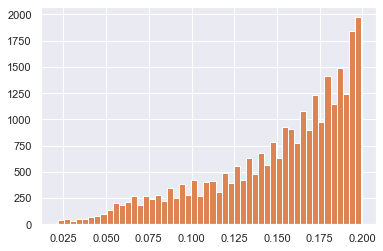

In [72]:
seqT1 = plt.hist(seq1, bins = 50)
seqD1 = plt.hist(seq4, bins = 50)

0.0035600000000000007
0.0035400000000000015


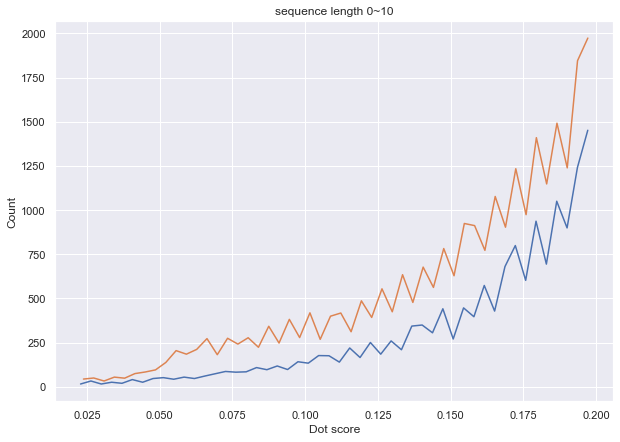

In [75]:
print(seqT1[1][1] - seqT1[1][0])
print(seqD1[1][1] - seqD1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('sequence length 0~10')
plt.plot(seqT1[1][:-1] + 0.00175, seqT1[0])
plt.plot(seqD1[1][:-1] + 0.00175, seqD1[0])
plt.show()

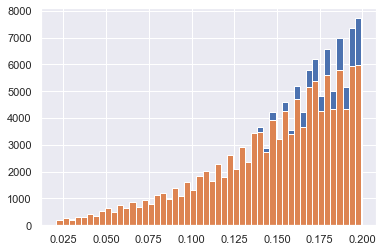

In [76]:
seqT2 = plt.hist(seq2, bins = 50)
seqD2 = plt.hist(seq5, bins = 50)

0.0035600000000000007
0.0035600000000000007


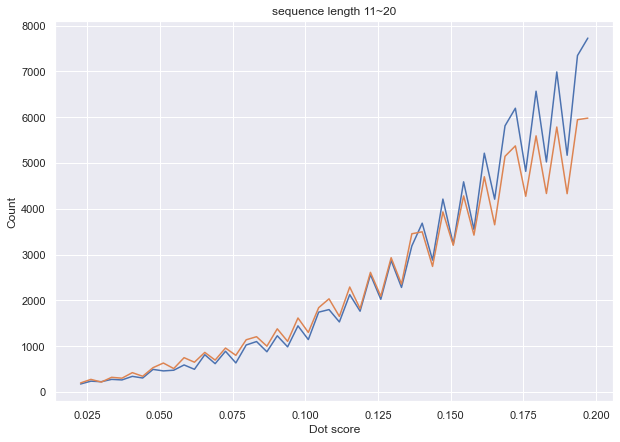

In [77]:
print(seqT2[1][1] - seqT2[1][0])
print(seqD2[1][1] - seqD2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('sequence length 11~20')
plt.plot(seqT2[1][:-1] + 0.00175, seqT2[0])
plt.plot(seqD2[1][:-1] + 0.00175, seqD2[0])
plt.show()

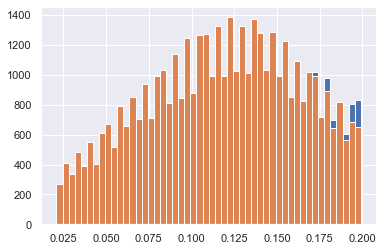

In [78]:
seqT3 = plt.hist(seq3, bins = 50)
seqD3 = plt.hist(seq6, bins = 50)

0.0035600000000000007
0.0035600000000000007


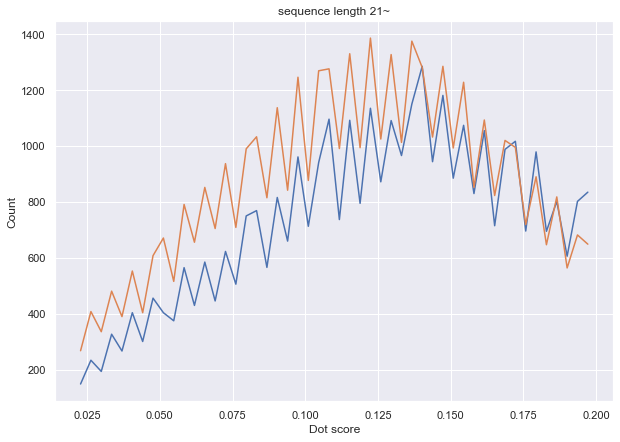

In [79]:
print(seqT3[1][1] - seqT3[1][0])
print(seqD3[1][1] - seqD3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('sequence length 21~')
plt.plot(seqT3[1][:-1] + 0.00175, seqT3[0])
plt.plot(seqD3[1][:-1] + 0.00175, seqD3[0])
plt.show()

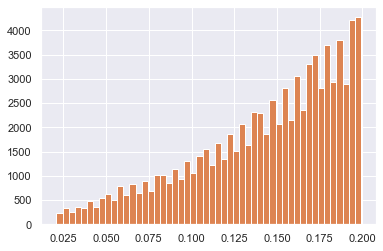

In [80]:
csT1 = plt.hist(cs1, bins = 50)
csD1 = plt.hist(cs4, bins = 50)

0.0035600000000000007
0.0035600000000000007


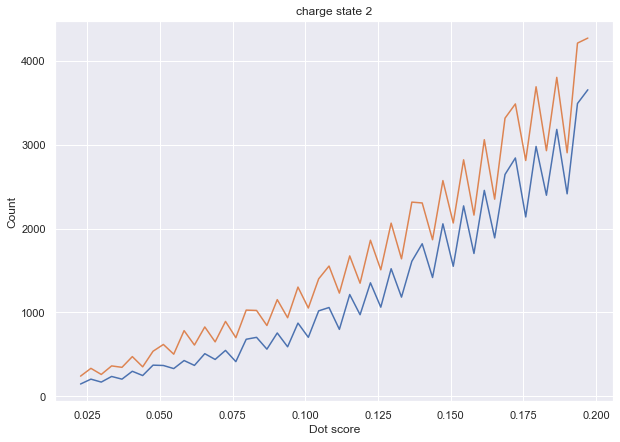

In [82]:
print(csT1[1][1] - csT1[1][0])
print(csD1[1][1] - csD1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('charge state 2')
plt.plot(csT1[1][:-1] + 0.00175, csT1[0])
plt.plot(csD1[1][:-1] + 0.00175, csD1[0])
plt.show()

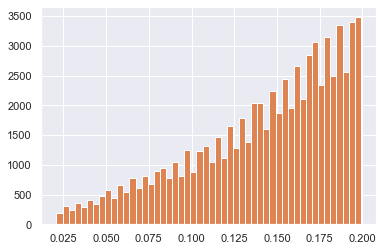

In [83]:
csT2 = plt.hist(cs2, bins = 50)
csD2 = plt.hist(cs5, bins = 50)

0.0035600000000000007
0.0035600000000000007


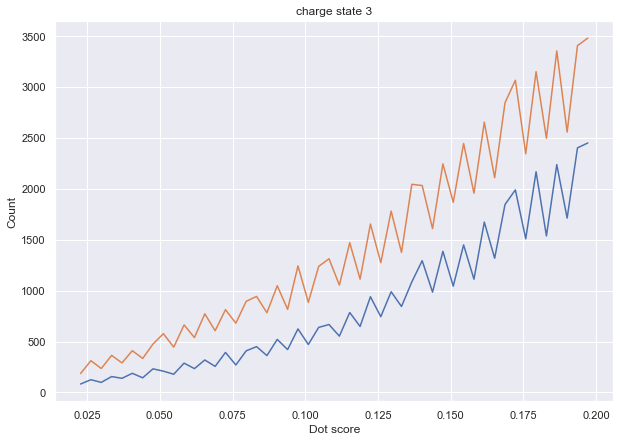

In [84]:
print(csT2[1][1] - csT2[1][0])
print(csD2[1][1] - csD2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('charge state 3')
plt.plot(csT2[1][:-1] + 0.00175, csT2[0])
plt.plot(csD2[1][:-1] + 0.00175, csD2[0])
plt.show()

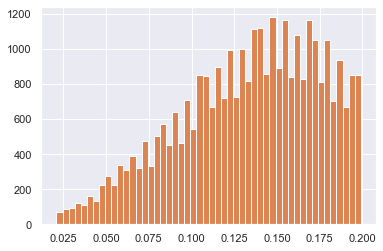

In [85]:
csT3 = plt.hist(cs3, bins = 50)
csD3 = plt.hist(cs6, bins = 50)

0.0035400000000000015
0.0035600000000000007


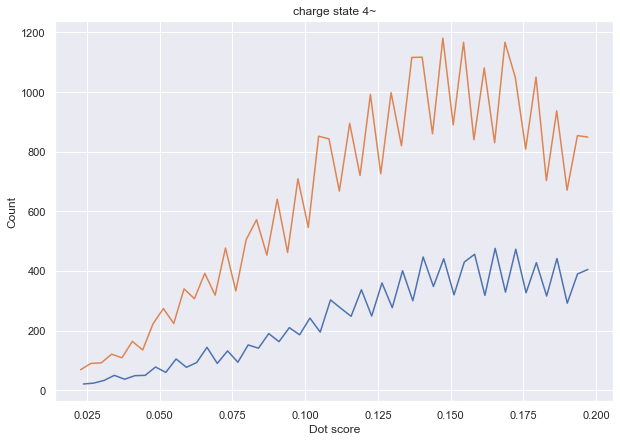

In [86]:
print(csT3[1][1] - csT3[1][0])
print(csD3[1][1] - csD3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('charge state 4~')
plt.plot(csT3[1][:-1] + 0.00175, csT3[0])
plt.plot(csD3[1][:-1] + 0.00175, csD3[0])
plt.show()

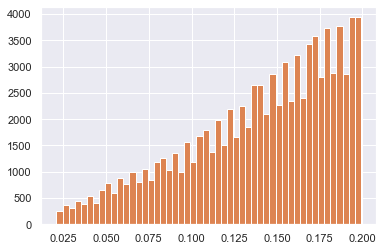

In [87]:
ctT1 = plt.hist(ct1, bins = 50)
ctD1 = plt.hist(ct4, bins = 50)

0.0035600000000000007
0.0035600000000000007


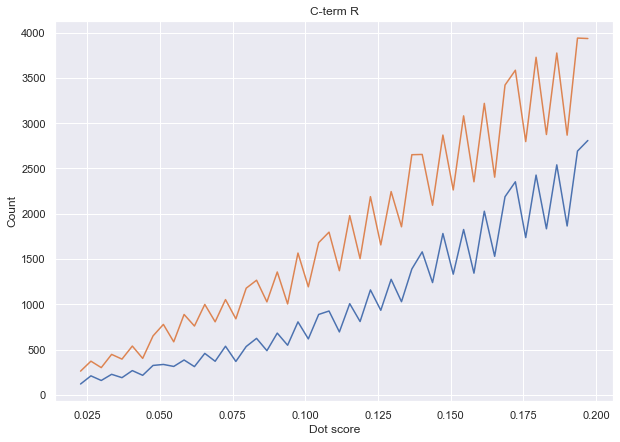

In [89]:
print(ctT1[1][1] - ctT1[1][0])
print(ctD1[1][1] - ctD1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('C-term R')
plt.plot(ctT1[1][:-1] + 0.00175, ctT1[0])
plt.plot(ctD1[1][:-1] + 0.00175, ctD1[0])
plt.show()

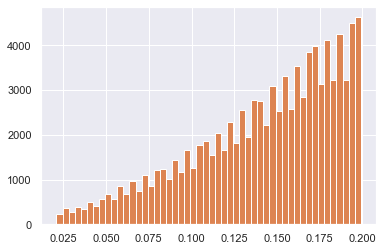

In [90]:
ctT2 = plt.hist(ct2, bins = 50)
ctD2 = plt.hist(ct5, bins = 50)

0.0035600000000000007
0.0035600000000000007


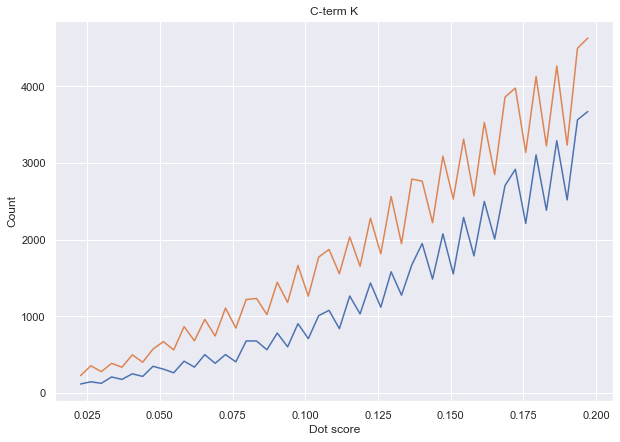

In [91]:
print(ctT2[1][1] - ctT2[1][0])
print(ctD2[1][1] - ctD2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('C-term K')
plt.plot(ctT2[1][:-1] + 0.00175, ctT2[0])
plt.plot(ctD2[1][:-1] + 0.00175, ctD2[0])
plt.show()

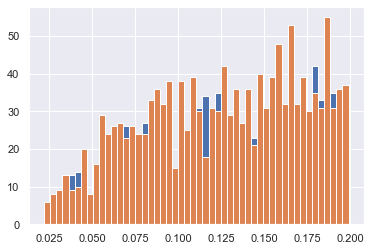

In [92]:
ctT3 = plt.hist(ct3, bins = 50)
ctD3 = plt.hist(ct6, bins = 50)

0.0035400000000000015
0.0035400000000000015


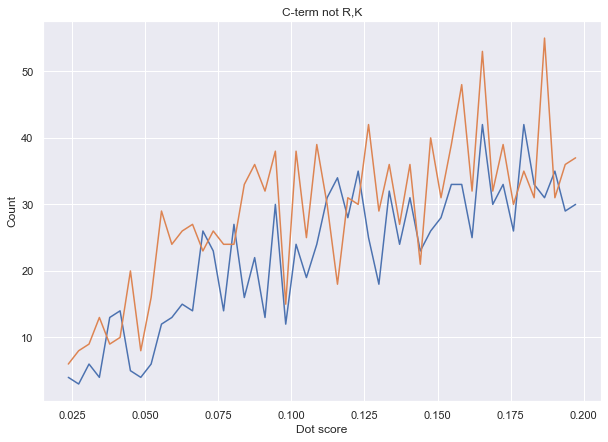

In [93]:
print(ctT3[1][1] - ctT3[1][0])
print(ctD3[1][1] - ctD3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('C-term not R,K')
plt.plot(ctT3[1][:-1] + 0.00175, ctT3[0])
plt.plot(ctD3[1][:-1] + 0.00175, ctD3[0])
plt.show()

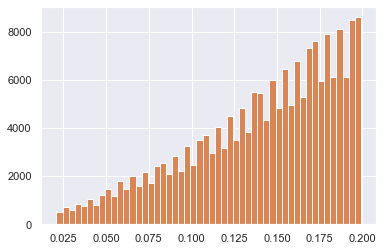

In [94]:
t = plt.hist(hekT['Dot'], bins = 50)
d = plt.hist(hekD['Dot'], bins = 50)

0.0035600000000000007
0.0035600000000000007


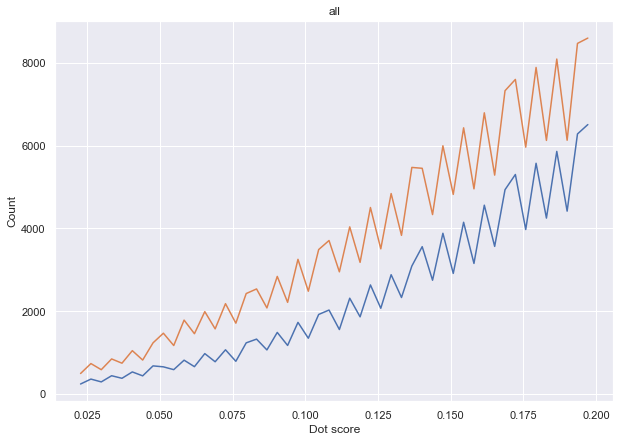

In [96]:
print(t[1][1] - t[1][0])
print(d[1][1] - d[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('all')
plt.plot(t[1][:-1] + 0.00175, t[0])
plt.plot(d[1][:-1] + 0.00175, d[0])
plt.show()